### Task 1 : PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NUMBER OF STUDY HOURS.
**Level Beginner, Prediction Using Supervised Machine Learning**

## **Sunil Singh**
*Data Science & Business Analytics Intern*<br>
*The Spark Foundation*

**This Notebook is Hosted on Kaggle Please Follow the given Link to Run the given Code**

[Task-1 Prediction Using Supervised Machine Learning](https://www.kaggle.com/sunilsinghuk/prediction-using-supervised-ml)

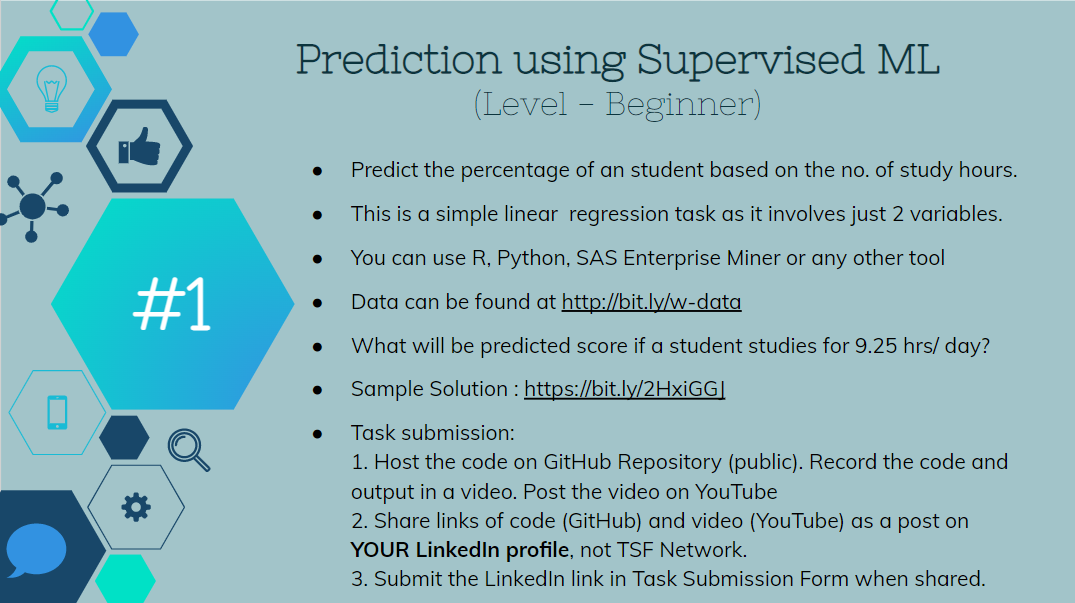

# Import all the necessary libraries :

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib library and pyplot function
%matplotlib inline
import statistics #statistics library
import seaborn as sns #seaborn library

from sklearn.model_selection import train_test_split # Import train and test data selection library
from sklearn.linear_model import LinearRegression # Import Linear Regression Model for development
from sklearn.metrics import mean_absolute_error # Import Mean Absolute Error detection method for Error Detection after Testing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-score/Student Score.csv


# Import and read student score data from the source :

In [2]:
dataset = pd.read_csv("../input/student-score/Student Score.csv") # Importing and reading given data file Student Score.csv as dataset.

In [3]:
dataset.head() # Check/View top 5 rows of available dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.tail() # Check/View bottom 5 rows of available dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Initial insights from the data :

In [5]:
dataset.info() # Basic information about data available.
               # like, RangeIndex, No. of ebtries, No. of data column, Non-null count and Dtype(Data type of column). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.isnull == True

False

In [7]:
dataset.describe() # Describe the data for Discriptive Statistical Analysis (DSA)
                   # DSA helps us to understand raw data and summarize it to present the info. about data available.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
statistics.variance(dataset['Hours'])

6.3761

In [9]:
dataset.var()

Hours       6.376100
Scores    639.426667
dtype: float64

In [10]:
statistics.median(dataset['Hours'])

4.8

In [11]:
dataset.median()

Hours      4.8
Scores    47.0
dtype: float64

In [12]:
dataset.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [13]:
dataset.corr() # To check the correlation between variables.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

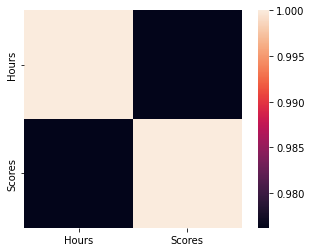

In [14]:
corr = dataset.corr()
sns.heatmap(corr, square=True) # Plot the correlation between variables using Heatmap.

# Exploratory Data Analysis (EDA) Visualization

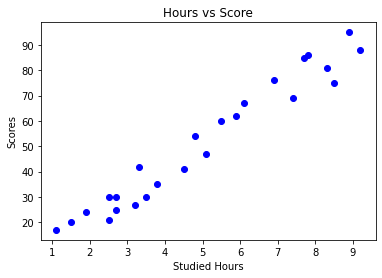

In [15]:
#Hours Vs Scores Plot 
plt.scatter(dataset['Hours'], dataset['Scores'], c='blue')
plt.title('Hours vs Score')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

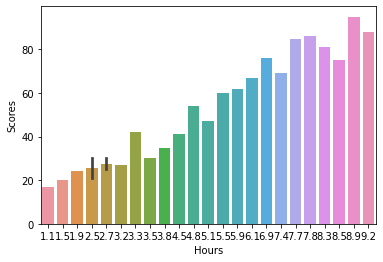

In [16]:
sns.barplot(x="Hours", y="Scores", data=dataset)
sns.set(rc={'figure.figsize':(9,9)})
plt.show()

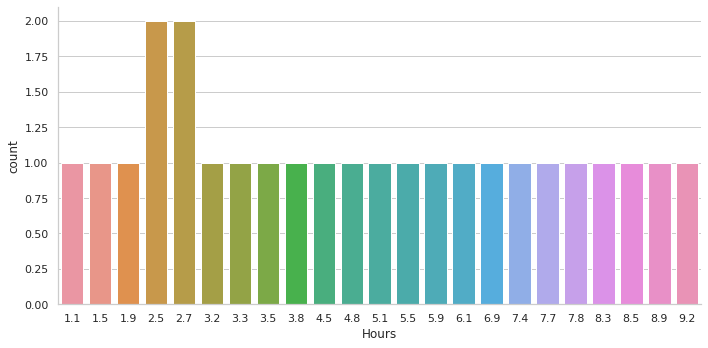

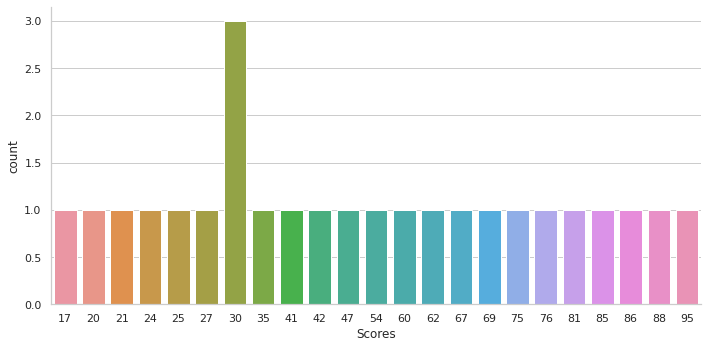

In [17]:
#Check the Bar Graph of Given Data using factorplot
sns.set_style("whitegrid")
sns.catplot(data=dataset, x='Hours', kind= 'count',height=5,aspect=2)
sns.catplot(data=dataset, x='Scores', kind= 'count',height=5,aspect=2)

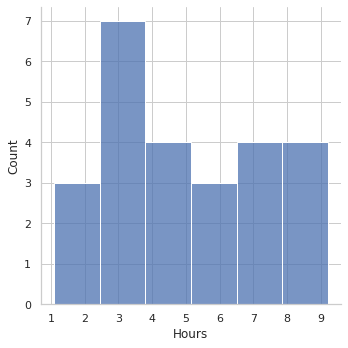

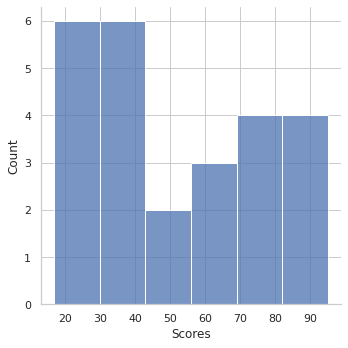

In [18]:
#Check the Distrubution of Data Using Distribution Graph
sns.displot(dataset['Hours'])
sns.displot(dataset['Scores'])

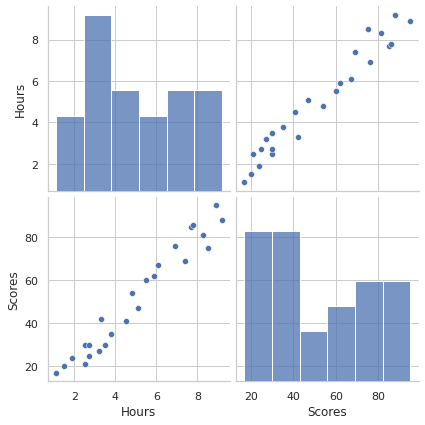

In [19]:
sns.pairplot(dataset, height=3)

<AxesSubplot:xlabel='Hours'>

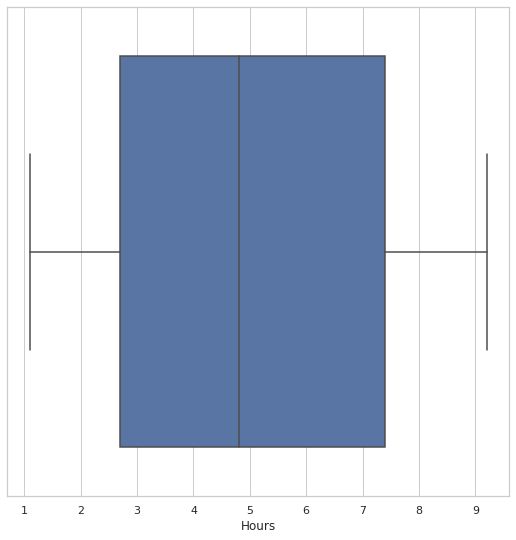

In [20]:
sns.boxplot(x=dataset['Hours'])


<AxesSubplot:xlabel='Scores'>

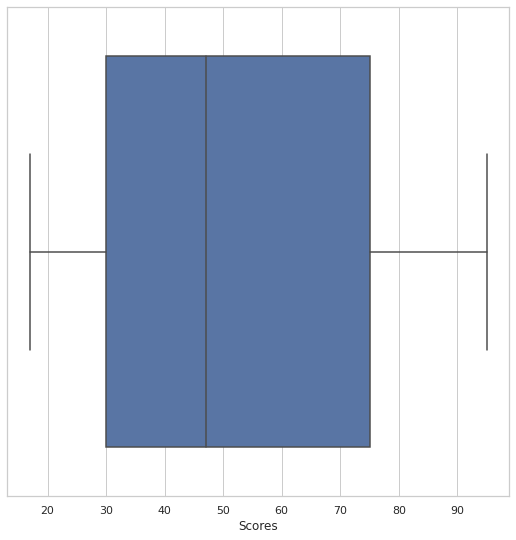

In [21]:
sns.boxplot(x=dataset['Scores'])

# Preparing Data for Model Development

# Train_Test Split 
### We split the data betweeb train and test segment for train the model and testing trained model for accuracy.

In [22]:
#x will take all the values except for the last column which is our dependent variable (target variable)
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Train the Simple Linear Regression model using Train data (x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state=0)

In [24]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

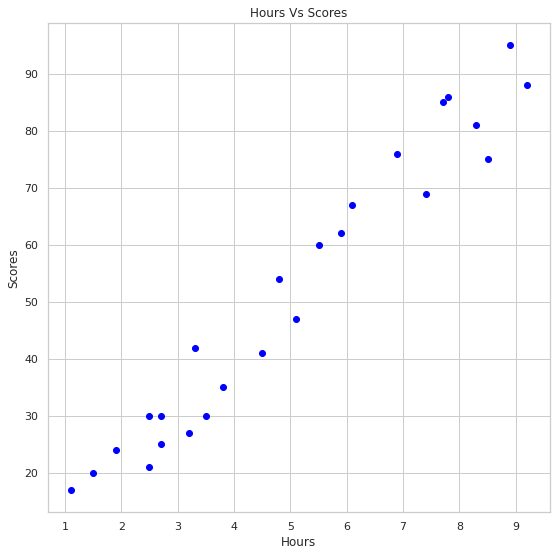

In [25]:
# Plotting Train Data in a scatter plot
plt.scatter(x,y,c='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Vs Scores')
plt.show()


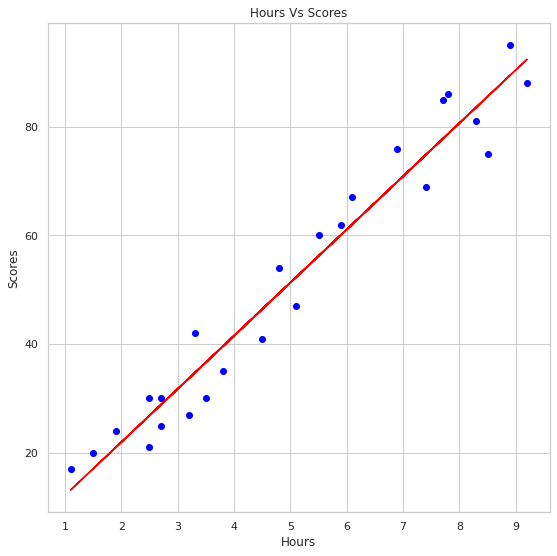

In [26]:
# Plotting Train data with Regression Line

line=lr.coef_*x+lr.intercept_
plt.plot(x, line, c='Red')

plt.scatter(x,y,c='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Vs Scores')
plt.show()

# Making Prediction on Liner Regiressing Model Developed using Test Data

In [27]:
y_prediction=lr.predict(x_test)
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [28]:
compare= pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
compare

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<AxesSubplot:>

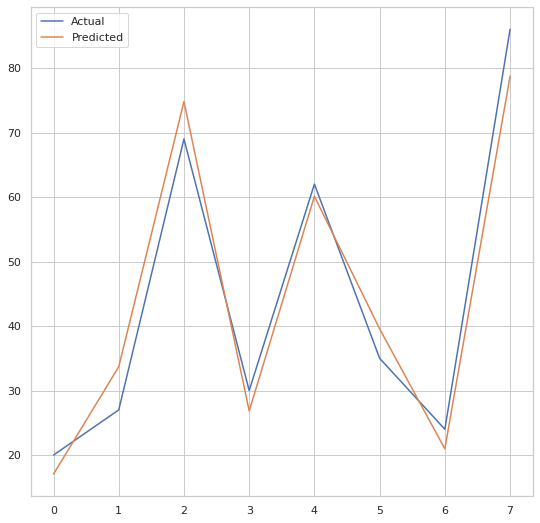

In [29]:
compare.plot()

In [30]:
model.score(x_train,y_train)

0.9484997422695115

In [31]:
model.score(x_test,y_test)

0.9568211104435257

# Predict Score on Developed Model using Linear Regressing

In [32]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = lr.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


In [33]:
dataset = np.array(10)
dataset = dataset.reshape(-1, 1)
pred = lr.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [100.25648225].


# Error Detection and Score of Developed Model

In [34]:
# Mean Ansolute Error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))

Mean Absolute Error: 4.419727808027651


In [35]:
# Model Score (r2_score)
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_prediction))

The R-Square of the model is:  0.9568211104435257


# Conclusion:

**We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91 and if he/she studies for 10 hours/day, Score will be 100.25648225.**